# Regresion Lineal

**y = a + b*x**

y es un valor resultante, mientras que x es un valor que varia.

Lo que tenemos que calcular son los valores de alfa y beta que nos permita predecir la variacion de x y darnos la correspondiente valor de salida.

ej.:
    **alquiler_mensual = alfa + beta * metros_cuadrados**
    
    
### Tecnicas de minimos cuadrados

https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados

El objetivo es minimizar la suma de los cuadrados

Beta se obtiene dividiendo covaracian por varianza:

    beta:
        Sum( Xi - Xme)*(Yi - Yme) --> Covarianza
        Sum(Xi - Xme)^2 --> Varianza

Alfa se obtiene despajandola del modelo:
    
    alfa = YMe - Beta*XMe
    
    
#### Error

Normalmente lo que el modelo no pueda explicar se lo va a considerar en la distribucion del error. (El error siempre se encuentra sumando al modelo)


# Modelacion
## Modelos con datos simulados

* y = a + b * x

* X = 100 valores distribuidos segun una N(1.5,2.5)
* Ye = 3 * 2.6 * x + e
* e estara distribuido en una N(0,0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data set
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 5 + 1.3 * x
y_act = 5 + 1.3 * x + res

In [3]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [4]:
data = pd.DataFrame({
    "X": x_list,
    "Y Actual": y_act_list,
    "Y Prediccion": y_pred_list
})

In [5]:
data.head()

,X,Y Actual,Y Prediccion
0,4.796393,9.391866,11.235311
1,-0.033879,4.322422,4.955957
2,0.825211,6.409119,6.072774
3,-1.053802,3.270012,3.630058
4,0.831761,6.376781,6.081289


In [6]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Prediccion')

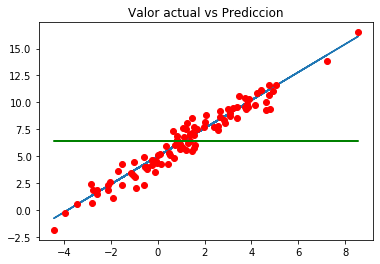

In [7]:
## lo que estamos viendo es que tan bueno es el modelo de prediccion
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs Prediccion")

***los datos que encontramos fuera de la linea son llamados datos observados***
* La distancia de ese punto hasta la linea del modelo es llamado SSD (suma de los cuadrados de las diferencias), esto quiere decir la diferencia con el modelo. es decir el error.
* Pero hay otra distancia a tener en cuenta SST que es la distancia de las sumas total, es decir, la distancia de ese punto con el promedio de Y
* Finalmente tenemos el SSR que es la suma del del SSD y SST en ese punto

Se puede calcular cada una de las distancias de los errores de cada punto.

A tener en cuenta: 
    
    SSR = SSD + SST

    R^2 = SSR / SST
    
El **R^2** es un factor de calidad del modelo pero no es definitivo.
**Mientras mas cercano es 1, significa que mayor es el ajuste al modelo**

In [8]:
data["SSR"] = (data["Y Prediccion"] - np.mean(y_act)) ** 2
data["SSD"] = (data["Y Prediccion"] - data["Y Actual"]) ** 2
data["SST"] = (data["Y Actual"] - np.mean(y_act)) ** 2

In [9]:
data.head()

,X,Y Actual,Y Prediccion,SSR,SSD,SST
0,4.796393,9.391866,11.235311,23.030121,3.398288,8.735135
1,-0.033879,4.322422,4.955957,2.191534,0.401366,4.468648
2,0.825211,6.409119,6.072774,0.132180,0.113128,0.000741
3,-1.053802,3.270012,3.630058,7.875220,0.129633,10.025633
4,0.831761,6.376781,6.081289,0.126061,0.087316,0.003547


In [10]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [11]:
SSR

976.8109131297822

In [12]:
SSD

58.84049646714629

In [13]:
SST

1026.7360521687592

In [14]:
## LA PREDICCION DE Y_PREDICCION ES UN VALOR BASTANTE ACERTADO
R2 = SSR/SST
R2

0.9513749040627132

(array([ 3.,  6.,  7., 18., 18., 19., 13.,  7.,  5.,  4.]),
 array([-1.66575796, -1.30701202, -0.94826609, -0.58952016, -0.23077423,
         0.1279717 ,  0.48671763,  0.84546356,  1.20420949,  1.56295542,
         1.92170135]),
 <a list of 10 Patch objects>)

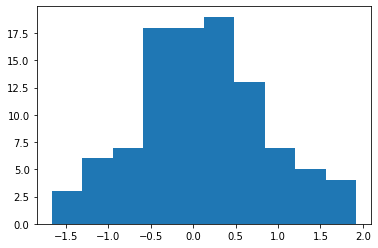

In [15]:
# otro factor de que este bien el modelo es que este centrado en 0 y se note una clara distribucion normal
plt.hist(data["Y Prediccion"] - data["Y Actual"])

## Obteniendo la recta de regresion

* y = a + b * x
* b = sum(xi - xMe)*(yi - yMe) / sum(x - xMe)^2
* a = yMe - b*xMe

In [16]:
x_mean = np.mean(data["X"])
y_mean = np.mean(data["Y Actual"])
x_mean, y_mean

(1.198841079600719, 6.4363399478722245)

In [17]:
beta = sum((data["X"] - x_mean)*(data["Y Actual"] - y_mean))/sum((data["X"] - x_mean)**2)

In [18]:
alfa = y_mean - beta * x_mean

In [19]:
alfa , beta

(4.882585263961537, 1.2960472495888902)

El modelo lineal obtenido por regresion es:
    ` Y = 3.1670150744921504 + 2.5425860094328696 * X`

In [20]:
data["Y Model"] = alfa + beta * data["X"]
data

,X,Y Actual,Y Prediccion,SSR,SSD,SST,Y Model
0,4.796393,9.391866,11.235311,23.030121,3.398288,8.735135,11.098937
1,-0.033879,4.322422,4.955957,2.191534,0.401366,4.468648,4.838676
2,0.825211,6.409119,6.072774,0.132180,0.113128,0.000741,5.952098
3,-1.053802,3.270012,3.630058,7.875220,0.129633,10.025633,3.516808
4,0.831761,6.376781,6.081289,0.126061,0.087316,0.003547,5.960586
...,...,...,...,...,...,...,...
95,2.062861,8.788656,7.681720,1.550971,1.225309,5.533393,7.556151
96,1.992975,7.753324,7.590867,1.332933,0.026392,1.734446,7.465575
97,1.381042,6.985465,6.795355,0.128892,0.036142,0.301539,6.672482
98,-0.101072,3.569117,4.868606,2.457790,1.688672,8.220968,4.751591


In [21]:
SSR = sum((data["Y Model"] - y_mean) ** 2)
SSD = sum((data["Y Model"] - data["Y Actual"]) ** 2)
SST = sum((data["Y Actual"] - y_mean) ** 2)
SSR, SSD , SST

(969.3967193025586, 57.33933286620096, 1026.7360521687592)

In [22]:
R2 = SSR/SST
R2

0.9441537747261494

Text(0.5, 1.0, 'Valor actual vs Prediccion')

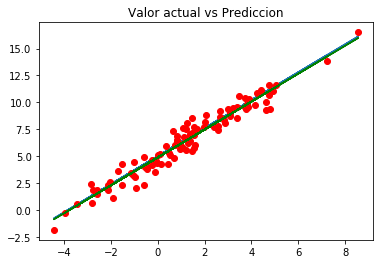

In [23]:
%matplotlib inline
plt.plot(data["X"],data["Y Prediccion"])
plt.plot(data["X"],data["Y Actual"],"ro")
plt.plot(data["X"],data["Y Model"],"g")
plt.title("Valor actual vs Prediccion")

## Parametros Estadisticos

### El valor estadistico `P` :
* En caso de de que Beta tiene tendencia a 0.

Si esto ocurre quiere decir que tenemos que aceptar que existe una hipostesis lineal entre x e y.

Para rechazar la hipotesis nula, tenemos que calcular el valor de p.
* Si p es nula o cercano, se descarta la primera hipotesisi ESTO QUIERE DECIR QUE CON SEGURIDAD EL VALOR DE BETA NO ES CERO

### El valor estadistico `F`:
* Existe un contraste hipotetico.
    * H0 = `beta1, beta2, ..., betaN = 0`
    * H1 = `betai <> 0` para algun valor i
* Puede existir mas de una Beta y una Xi.
* `F = (SSR/k)/(SSD/(n - k - 1))`
    * `SSR = SUM(y(xi) - yMe)^2`
    * `SSD = SUM(yi - y(xi))^2`
    * `SST = SUM(yi - yMe)^2`
    
**En el caso de una regresion lineal multiple:**

Mirar el nivel de significacion de cada parametro por separado, puede ser realmente pequenio y aceptar la hipotesis alternativa de que cada uno por separado no es nulo y existe correlacion entre la prediccion y cada variable predictora por separado

Si los miramos todos juntos, podria ocurrir que el p-valor fuera grande y acabaramos aceptando la hipotesis nula de que el conjunto de variables predictoras no guardan relacion alguna con la prediccion.


### Error Estandar de los residuos:
`RSE` es la desviacion estandar del termino error (desviacion de la parte de datos que el modelo no es capaz de explicar por falta de informacion o mas datos adiccionales)

* En caso de una regresion lineal simple:
`RSE = SQRT((SUM(yi - y(xi)^2)/(n - 2)) = SQRT(SSD/(N - 2)`
* En caso de regresion lineal multiple:
`RSE = SQRT((SUM(yi - y(xi)^2)/(n - k - 1)) = SQRT(SSD/(N- k - 1)`

In [26]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE
#Cuanto menor sea el valor mejor

0.764915180479889

In [28]:
print("Este seria el porcentaje de error: ",RSE / np.mean(data["Y Actual"]))

Este seria el porcentaje de error:  0.11884319142166515
